In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [12]:
# ----------------- CONFIG -----------------
CSV_PATH = "ScoreSight_ML_Season_LeagueWinner_Champion (1).csv"  # <-- Change this to your CSV
RANDOM_STATE = 42
TEST_SIZE = 0.25
N_ESTIMATORS = 200

# 1️⃣ Load data
df = pd.read_csv(CSV_PATH)

# 2️⃣ Ensure points column
if 'points' not in df.columns:
    if 'wins' in df.columns and 'draws' in df.columns:
        df['points'] = df['wins']*3 + df['draws']
    else:
        raise ValueError("Dataset must contain 'points' column or 'wins' + 'draws' to compute points.")

In [14]:
# ----------------- CONFIG -----------------
CSV_PATH = "ScoreSight_ML_Season_LeagueWinner_Champion (1).csv"
RANDOM_STATE = 42
TEST_SIZE = 0.25
N_ESTIMATORS = 200

# 1️⃣ Load data
df = pd.read_csv(CSV_PATH)
print("Dataset loaded successfully!")
print(df.head())

# 2️⃣ Ensure points column
if 'points' not in df.columns:
    if 'wins' in df.columns and 'draws' in df.columns:
        df['points'] = df['wins']*3 + df['draws']
        print("Points column computed as: wins*3 + draws")
    else:
        raise ValueError("Dataset must contain 'points' column or 'wins' + 'draws' to compute points.")

Dataset loaded successfully!
    season         team  matches_played  wins  draws  losses  points_per_game  \
0  2015-16  Bournemouth              38    11      9      18         1.105263   
1  2015-16      Norwich              38     9      7      22         0.894737   
2  2015-16   Man United              38    19      9      10         1.736842   
3  2015-16      Chelsea              38    12     14      12         1.315789   
4  2015-16      Everton              38    11     14      13         1.236842   

   goals_scored  goals_conceded  goal_difference  target_total_points  \
0          45.0            67.0            -22.0                   42   
1          39.0            67.0            -28.0                   34   
2          49.0            35.0             14.0                   66   
3          59.0            53.0              6.0                   50   
4          59.0            55.0              4.0                   47   

   target_league_position  target_champion  t

In [16]:
# Check selected features
print("Selected features:", features)

# Show first few rows of X
print("\nFeature matrix (X):")
print(X.head())

# Show first few values of target
print("\nTarget (y):")
print(y.head())


Selected features: ['matches_played', 'wins', 'draws', 'losses', 'goal_difference', 'team_encoded']

Feature matrix (X):
   matches_played  wins  draws  losses  goal_difference  team_encoded
0              38    11      9      18            -22.0             2
1              38     9      7      22            -28.0            20
2              38    19      9      10             14.0            18
3              38    12     14      12              6.0             7
4              38    11     14      13              4.0             9

Target (y):
0    42
1    34
2    66
3    50
4    47
Name: points, dtype: int64


RMSE: 1.76, MAE: 1.25, R²: 0.99


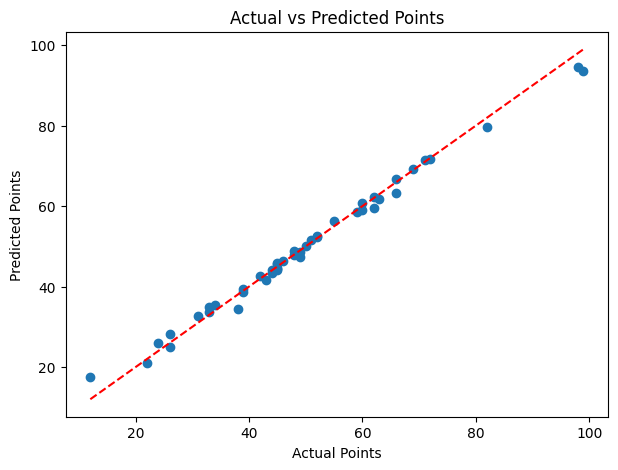

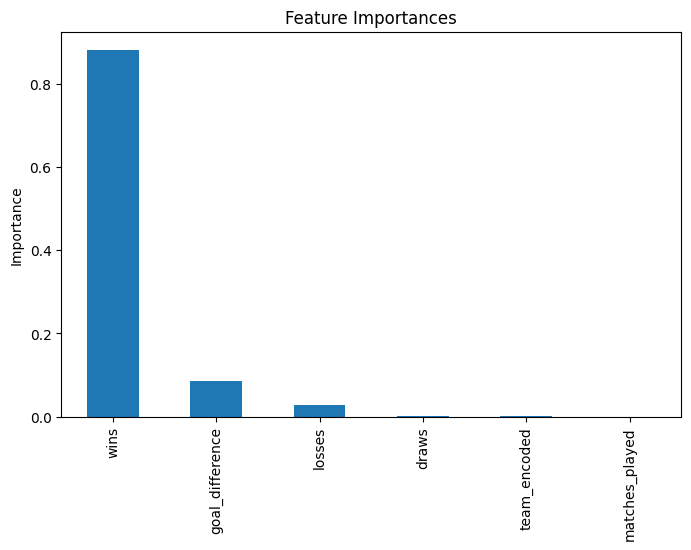

,team,actual_points,predicted_points
19,Liverpool,60,59.04
42,Fulham,26,25.06
153,Liverpool,82,79.54
78,Chelsea,66,66.84
145,Newcastle,60,60.84
15,Watford,45,44.64
24,Everton,49,48.65
68,Leicester,62,62.24
113,Leeds,38,34.40
118,Arsenal,69,69.26


In [21]:
# After training and prediction
import matplotlib.pyplot as plt
from IPython.display import display

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

# Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.title("Actual vs Predicted Points")
plt.show()

# Feature importance
fi = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8,5))
fi.plot(kind='bar')
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

# Predicted vs Actual table
results = X_test.copy()
if 'team' in df.columns:
    results['team'] = df.loc[X_test.index, 'team']
results['actual_points'] = y_test
results['predicted_points'] = np.round(y_pred, 2)
display(results[['team','actual_points','predicted_points']])
